Generate ACDC 2D lists

In [25]:
import numpy as np
from glob import glob
import os
from tqdm import tqdm
from monai.transforms import ResizeWithPadOrCrop
from pathlib import Path
import shutil
import nibabel as nib
import pickle

with open(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\out\nnUNet_preprocessed\Task031_ACDC\splits_final.pkl", 'rb') as f:
    data = pickle.load(f)
    training_patients = data[0]['train']
    validation_patients = data[0]['val']

training_patients = sorted(list(set([x.split('_')[0] for x in training_patients])))
validation_patients = sorted(list(set([x.split('_')[0] for x in validation_patients])))

path_list = glob(os.path.join('voxelmorph_ACDC_2D', '*.gz'))
path_list_gt = glob(os.path.join('voxelmorph_ACDC_gt_2D', '*.gz'))
path_list_train = sorted([x for x in path_list if os.path.basename(x).split('_')[0] in training_patients])
path_list_train_gt = sorted([x for x in path_list_gt if os.path.basename(x).split('_')[0] in training_patients])
path_list_val = sorted([x for x in path_list if os.path.basename(x).split('_')[0] in validation_patients])
path_list_val_gt = sorted([x for x in path_list_gt if os.path.basename(x).split('_')[0] in validation_patients])

path_dict_in = {'path_list_train': {},
                'path_list_train_gt': {},
                'path_list_val': {},
                'path_list_val_gt': {}}

for patient_nb in training_patients:
    path_dict_in['path_list_train'][patient_nb] = sorted([x for x in path_list_train if patient_nb in x])
    path_dict_in['path_list_train_gt'][patient_nb] = sorted([x for x in path_list_train_gt if patient_nb in x])

for patient_nb in validation_patients:
    path_dict_in['path_list_val'][patient_nb] = sorted([x for x in path_list_val if patient_nb in x])
    path_dict_in['path_list_val_gt'][patient_nb] = sorted([x for x in path_list_val_gt if patient_nb in x])


path_dict_out_train = {'path_list_train_moving': [],
                        'path_list_train_fixed': [],
                        'path_list_train_moving_gt': [],
                        'path_list_train_fixed_gt': []}

path_dict_out_val = {'path_list_val_moving': [],
                     'path_list_val_fixed': [],
                    'path_list_val_moving_gt': []}


for patient_nb in path_dict_in['path_list_train'].keys():
    with open(path_dict_in['path_list_train'][patient_nb][0][:-7] + '.pkl', 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        es_number = np.rint(data['es_number']).astype(int)
        ed_list = [path_dict_in['path_list_train'][patient_nb][ed_number]]
        fixed_list = [path_dict_in['path_list_train'][patient_nb][es_number]]
        path_dict_out_train['path_list_train_moving'].extend(ed_list)
        path_dict_out_train['path_list_train_fixed'].extend(fixed_list)

for patient_nb in path_dict_in['path_list_train_gt'].keys():
    ed_list = [path_dict_in['path_list_train_gt'][patient_nb][0]]
    fixed_list = [path_dict_in['path_list_train_gt'][patient_nb][1]]
    path_dict_out_train['path_list_train_moving_gt'].extend(ed_list)
    path_dict_out_train['path_list_train_fixed_gt'].extend(fixed_list)

for patient_nb in path_dict_in['path_list_val'].keys():
    with open(path_dict_in['path_list_val'][patient_nb][0][:-7] + '.pkl', 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        ed_list = [path_dict_in['path_list_val'][patient_nb][ed_number]] * (len(path_dict_in['path_list_val'][patient_nb]) - 1)
        fixed_list = path_dict_in['path_list_val'][patient_nb]
        fixed_list.remove(path_dict_in['path_list_val'][patient_nb][ed_number])
        assert len(ed_list) == len(fixed_list)
        path_dict_out_val['path_list_val_moving'].extend(ed_list)
        path_dict_out_val['path_list_val_fixed'].extend(fixed_list)

for patient_nb in path_dict_in['path_list_val_gt'].keys():
    ed_list = [path_dict_in['path_list_val_gt'][patient_nb][0]] * (len(path_dict_in['path_list_val'][patient_nb]) - 1)
    path_dict_out_val['path_list_val_moving_gt'].extend(ed_list)


path_list_train = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_moving']]
with open('train_list_moving_2D_ACDC.txt', 'w') as f:
    f.writelines(path_list_train)

path_list_train = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_fixed']]
with open('train_list_fixed_2D_ACDC.txt', 'w') as f:
    f.writelines(path_list_train)

path_list_train_gt = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_moving_gt']]
with open('train_list_moving_seg_2D_ACDC.txt', 'w') as f:
    f.writelines(path_list_train_gt)

path_list_train_gt = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_fixed_gt']]
with open('train_list_fixed_seg_2D_ACDC.txt', 'w') as f:
    f.writelines(path_list_train_gt)

path_list_val = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_val['path_list_val_moving']]
with open('val_list_moving_2D_ACDC.txt', 'w') as f:
    f.writelines(path_list_val)

path_list_val = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_val['path_list_val_fixed']]
with open('val_list_fixed_2D_ACDC.txt', 'w') as f:
    f.writelines(path_list_val)

path_list_val_gt = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_val['path_list_val_moving_gt']]
with open('val_list_moving_seg_2D_ACDC.txt', 'w') as f:
    f.writelines(path_list_val_gt)

In [1]:
for t1 in reversed(range(10)):
    print(t1)

9
8
7
6
5
4
3
2
1
0


In [ ]:
%matplotlib qt

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os

path_list_1 = glob(os.path.join(r'C:\Users\Portal\Documents\voxelmorph\2024-02-03_20H08\Task032_Lib\fold_0\Lib\val\Postprocessed\Segmentation\patient011\temp_allClasses', '*.gz'))
path_list_2 = glob(os.path.join(r'C:\Users\Portal\Documents\voxelmorph\2024-02-03_20H08\Task032_Lib\fold_0\Lib\val\Postprocessed\Segmentation\patient011\temp_allClasses', '*.gz'))
path_list_3 = glob(os.path.join(r'C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Lib_training_2\patient011', '*_gt.nii.gz'))
path_list_4 = glob(os.path.join(r'C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Lib_training_2\patient011', '*.nii.gz'))
path_list_4 = [x for x in path_list_4 if '_gt' not in x]

for path1, path2, path3, path4 in zip(path_list_1, path_list_2, path_list_3, path_list_4):
    print(path1)
    print(path2)
    print(path3)
    data = nib.load(path1)
    arr = data.get_fdata()

    data2 = nib.load(path2)
    arr2 = data2.get_fdata()

    data3 = nib.load(path3)
    arr3 = data3.get_fdata()
    print(arr3.shape)

    data4 = nib.load(path4)
    arr4 = data4.get_fdata()
    print(arr4.shape)

    fig, ax = plt.subplots(1, 4)
    ax[0].imshow(arr[:, :, 1], cmap='gray')
    ax[1].imshow(arr2[:, :, 1], cmap='gray')
    ax[2].imshow(arr3[:, :, 1], cmap='gray')
    ax[3].imshow(arr4[:, :, 1], cmap='gray')
    while not plt.waitforbuttonpress(): pass
    plt.close(fig)

Generate Lib 2D lists all

In [4]:
import numpy as np
from glob import glob
import os
from tqdm import tqdm
from monai.transforms import ResizeWithPadOrCrop
from pathlib import Path
import shutil
import nibabel as nib
import pickle

with open(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\out\nnUNet_preprocessed\Task032_Lib\splits_final.pkl", 'rb') as f:
    data = pickle.load(f)
    training_patients = data[0]['train']
    validation_patients = data[0]['val']

path_list = glob(os.path.join('voxelmorph_Lib_2D', '*.gz'))
path_list_gt = glob(os.path.join('voxelmorph_Lib_2D_gt', '*.gz'))
path_list_train = sorted([x for x in path_list if os.path.basename(x)[:-7] in training_patients])
path_list_train_gt = sorted([x for x in path_list_gt if os.path.basename(x)[:-7] in training_patients])
path_list_val = sorted([x for x in path_list if os.path.basename(x)[:-7] in validation_patients])
path_list_val_gt = sorted([x for x in path_list_gt if os.path.basename(x)[:-7] in validation_patients])

path_dict_in = {'path_list_train': {},
                'path_list_train_gt': {},
                'path_list_val': {},
                'path_list_val_gt': {}}

for training_patient_name in training_patients:
    patient_nb = os.path.basename(training_patient_name).split('_')[0]
    path_dict_in['path_list_train'][patient_nb] = sorted([x for x in path_list_train if patient_nb in x])
    path_dict_in['path_list_train_gt'][patient_nb] = sorted([x for x in path_list_train_gt if patient_nb in x])

for validation_patient_name in validation_patients:
    patient_nb = os.path.basename(validation_patient_name).split('_')[0]
    path_dict_in['path_list_val'][patient_nb] = sorted([x for x in path_list_val if patient_nb in x])
    path_dict_in['path_list_val_gt'][patient_nb] = sorted([x for x in path_list_val_gt if patient_nb in x])


path_dict_out_train = {'path_list_train_moving': [],
                        'path_list_train_fixed': [],
                        'path_list_train_moving_gt': [],
                        'path_list_train_fixed_gt': []}

path_dict_out_val = {'path_list_val_moving': [],
                     'path_list_val_fixed': [],
                    'path_list_val_moving_gt': []}


for patient_nb in path_dict_in['path_list_train'].keys():
    with open(os.path.join('voxelmorph_Lib_2D', patient_nb + '_frame01.pkl'), 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        ed_list = [path_dict_in['path_list_train'][patient_nb][ed_number]] * (len(path_dict_in['path_list_train'][patient_nb]) - 1)
        fixed_list = path_dict_in['path_list_train'][patient_nb]
        fixed_list.remove(path_dict_in['path_list_train'][patient_nb][ed_number])
        assert len(ed_list) == len(fixed_list)
        path_dict_out_train['path_list_train_moving'].extend(ed_list)
        path_dict_out_train['path_list_train_fixed'].extend(fixed_list)

for patient_nb in path_dict_in['path_list_train_gt'].keys():
    with open(os.path.join('voxelmorph_Lib_2D', patient_nb + '_frame01.pkl'), 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        ed_list = [path_dict_in['path_list_train_gt'][patient_nb][ed_number]] * (len(path_dict_in['path_list_train_gt'][patient_nb]) - 1)
        fixed_list = path_dict_in['path_list_train_gt'][patient_nb]
        fixed_list.remove(path_dict_in['path_list_train_gt'][patient_nb][ed_number])
        assert len(ed_list) == len(fixed_list)
        path_dict_out_train['path_list_train_moving_gt'].extend(ed_list)
        path_dict_out_train['path_list_train_fixed_gt'].extend(fixed_list)

for patient_nb in path_dict_in['path_list_val'].keys():
    with open(os.path.join('voxelmorph_Lib_2D', patient_nb + '_frame01.pkl'), 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        ed_list = [path_dict_in['path_list_val'][patient_nb][ed_number]] * (len(path_dict_in['path_list_val'][patient_nb]) - 1)
        fixed_list = path_dict_in['path_list_val'][patient_nb]
        fixed_list.remove(path_dict_in['path_list_val'][patient_nb][ed_number])
        assert len(ed_list) == len(fixed_list)
        path_dict_out_val['path_list_val_moving'].extend(ed_list)
        path_dict_out_val['path_list_val_fixed'].extend(fixed_list)

for patient_nb in path_dict_in['path_list_val_gt'].keys():
    with open(os.path.join('voxelmorph_Lib_2D', patient_nb + '_frame01.pkl'), 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        ed_list = [path_dict_in['path_list_val_gt'][patient_nb][ed_number]] * (len(path_dict_in['path_list_val_gt'][patient_nb]) - 1)
        path_dict_out_val['path_list_val_moving_gt'].extend(ed_list)


path_list_train = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_moving']]
with open('train_list_moving_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_train)

path_list_train = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_fixed']]
with open('train_list_fixed_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_train)

path_list_train_gt = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_moving_gt']]
with open('train_list_moving_seg_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_train_gt)

path_list_train_gt = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_fixed_gt']]
with open('train_list_fixed_seg_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_train_gt)

path_list_val = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_val['path_list_val_moving']]
with open('val_list_moving_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_val)

path_list_val = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_val['path_list_val_fixed']]
with open('val_list_fixed_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_val)

path_list_val_gt = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_val['path_list_val_moving_gt']]
with open('val_list_moving_seg_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_val_gt)

Generate Lists Lib only ED and ES

In [5]:
import numpy as np
from glob import glob
import os
from tqdm import tqdm
from monai.transforms import ResizeWithPadOrCrop
from pathlib import Path
import shutil
import nibabel as nib
import pickle

with open(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\out\nnUNet_preprocessed\Task032_Lib\splits_final.pkl", 'rb') as f:
    data = pickle.load(f)
    training_patients = data[0]['train']
    validation_patients = data[0]['val']

path_list = glob(os.path.join('voxelmorph_Lib_2D', '*.gz'))
path_list_gt = glob(os.path.join('voxelmorph_Lib_2D_gt', '*.gz'))
path_list_train = sorted([x for x in path_list if os.path.basename(x)[:-7] in training_patients])
path_list_train_gt = sorted([x for x in path_list_gt if os.path.basename(x)[:-7] in training_patients])
path_list_val = sorted([x for x in path_list if os.path.basename(x)[:-7] in validation_patients])
path_list_val_gt = sorted([x for x in path_list_gt if os.path.basename(x)[:-7] in validation_patients])

path_dict_in = {'path_list_train': {},
                'path_list_train_gt': {},
                'path_list_val': {},
                'path_list_val_gt': {}}

for training_patient_name in training_patients:
    patient_nb = os.path.basename(training_patient_name).split('_')[0]
    path_dict_in['path_list_train'][patient_nb] = sorted([x for x in path_list_train if patient_nb in x])
    path_dict_in['path_list_train_gt'][patient_nb] = sorted([x for x in path_list_train_gt if patient_nb in x])

for validation_patient_name in validation_patients:
    patient_nb = os.path.basename(validation_patient_name).split('_')[0]
    path_dict_in['path_list_val'][patient_nb] = sorted([x for x in path_list_val if patient_nb in x])
    path_dict_in['path_list_val_gt'][patient_nb] = sorted([x for x in path_list_val_gt if patient_nb in x])


path_dict_out_train = {'path_list_train_moving': [],
                        'path_list_train_fixed': [],
                        'path_list_train_moving_gt': [],
                        'path_list_train_fixed_gt': []}

path_dict_out_val = {'path_list_val_moving': [],
                     'path_list_val_fixed': [],
                    'path_list_val_moving_gt': []}


for patient_nb in path_dict_in['path_list_train'].keys():
    with open(os.path.join('voxelmorph_Lib_2D', patient_nb + '_frame01.pkl'), 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        es_number = np.rint(data['es_number']).astype(int)
        ed_list = [path_dict_in['path_list_train'][patient_nb][ed_number]]
        fixed_list = [path_dict_in['path_list_train'][patient_nb][es_number]]
        path_dict_out_train['path_list_train_moving'].extend(ed_list)
        path_dict_out_train['path_list_train_fixed'].extend(fixed_list)

for patient_nb in path_dict_in['path_list_train_gt'].keys():
    with open(os.path.join('voxelmorph_Lib_2D', patient_nb + '_frame01.pkl'), 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        es_number = np.rint(data['es_number']).astype(int)
        ed_list = [path_dict_in['path_list_train_gt'][patient_nb][ed_number]]
        fixed_list = [path_dict_in['path_list_train_gt'][patient_nb][es_number]]
        path_dict_out_train['path_list_train_moving_gt'].extend(ed_list)
        path_dict_out_train['path_list_train_fixed_gt'].extend(fixed_list)

for patient_nb in path_dict_in['path_list_val'].keys():
    with open(os.path.join('voxelmorph_Lib_2D', patient_nb + '_frame01.pkl'), 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        ed_list = [path_dict_in['path_list_val'][patient_nb][ed_number]] * (len(path_dict_in['path_list_val'][patient_nb]) - 1)
        fixed_list = path_dict_in['path_list_val'][patient_nb]
        fixed_list.remove(path_dict_in['path_list_val'][patient_nb][ed_number])
        assert len(ed_list) == len(fixed_list)
        path_dict_out_val['path_list_val_moving'].extend(ed_list)
        path_dict_out_val['path_list_val_fixed'].extend(fixed_list)

for patient_nb in path_dict_in['path_list_val_gt'].keys():
    with open(os.path.join('voxelmorph_Lib_2D', patient_nb + '_frame01.pkl'), 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        ed_list = [path_dict_in['path_list_val_gt'][patient_nb][ed_number]] * (len(path_dict_in['path_list_val_gt'][patient_nb]) - 1)
        path_dict_out_val['path_list_val_moving_gt'].extend(ed_list)


path_list_train = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_moving']]
with open('train_list_moving_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_train)

path_list_train = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_fixed']]
with open('train_list_fixed_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_train)

path_list_train_gt = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_moving_gt']]
with open('train_list_moving_seg_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_train_gt)

path_list_train_gt = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_fixed_gt']]
with open('train_list_fixed_seg_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_train_gt)

path_list_val = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_val['path_list_val_moving']]
with open('val_list_moving_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_val)

path_list_val = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_val['path_list_val_fixed']]
with open('val_list_fixed_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_val)

path_list_val_gt = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_val['path_list_val_moving_gt']]
with open('val_list_moving_seg_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_val_gt)

In [2]:
import numpy as np
from glob import glob
import os
from tqdm import tqdm
from monai.transforms import ResizeWithPadOrCrop
from pathlib import Path
import shutil
import nibabel as nib
import pickle

with open(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\out\nnUNet_preprocessed\Task045_Lib\splits_final.pkl", 'rb') as f:
    data = pickle.load(f)
    training_patients = data[0]['train']
    validation_patients = data[0]['val']

path_list = glob(os.path.join(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Lib_no_resampling", '*.gz'))
path_list_gt = glob(os.path.join(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Lib_no_resampling_gt", '*.gz'))
path_list_train = sorted([x for x in path_list if os.path.basename(x)[:-7] in training_patients])
path_list_train_gt = sorted([x for x in path_list_gt if os.path.basename(x)[:-7] in training_patients])
path_list_val = sorted([x for x in path_list if os.path.basename(x)[:-7] in validation_patients])
path_list_val_gt = sorted([x for x in path_list_gt if os.path.basename(x)[:-7] in validation_patients])

path_dict_in = {'path_list_train': {},
                'path_list_train_gt': {},
                'path_list_val': {},
                'path_list_val_gt': {}}


for training_patient_name in training_patients:
    patient_nb = os.path.basename(training_patient_name).split('_')[0]
    path_dict_in['path_list_train'][patient_nb] = sorted([x for x in path_list_train if patient_nb in x])
    path_dict_in['path_list_train_gt'][patient_nb] = sorted([x for x in path_list_train_gt if patient_nb in x])

for validation_patient_name in validation_patients:
    patient_nb = os.path.basename(validation_patient_name).split('_')[0]
    path_dict_in['path_list_val'][patient_nb] = sorted([x for x in path_list_val if patient_nb in x])
    path_dict_in['path_list_val_gt'][patient_nb] = sorted([x for x in path_list_val_gt if patient_nb in x])


path_dict_out_train = {'path_list_train_moving': [],
                        'path_list_train_fixed': [],
                        'path_list_train_moving_gt': [],
                        'path_list_train_fixed_gt': []}


for patient_nb in path_dict_in['path_list_train'].keys():
    with open(os.path.join(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Lib_no_resampling", patient_nb + '_frame01.pkl'), 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        es_number = np.rint(data['es_number']).astype(int)
        ed_list = [path_dict_in['path_list_train'][patient_nb][ed_number]]
        es_list = [path_dict_in['path_list_train'][patient_nb][es_number]]
        path_dict_out_train['path_list_train_moving'].extend(es_list)
        path_dict_out_train['path_list_train_fixed'].extend(ed_list)

for patient_nb in path_dict_in['path_list_train_gt'].keys():
    with open(os.path.join(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Lib_no_resampling", patient_nb + '_frame01.pkl'), 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        es_number = np.rint(data['es_number']).astype(int)
        ed_list = [path_dict_in['path_list_train_gt'][patient_nb][ed_number]]
        es_list = [path_dict_in['path_list_train_gt'][patient_nb][es_number]]
        path_dict_out_train['path_list_train_moving_gt'].extend(es_list)
        path_dict_out_train['path_list_train_fixed_gt'].extend(ed_list)


path_list_train = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_moving']]
with open('train_list_moving_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_train)

path_list_train = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_fixed']]
with open('train_list_fixed_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_train)

path_list_train_gt = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_moving_gt']]
with open('train_list_moving_seg_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_train_gt)

path_list_train_gt = [x.replace(os.sep, '/') + '\n' for x in path_dict_out_train['path_list_train_fixed_gt']]
with open('train_list_fixed_seg_2D_Lib.txt', 'w') as f:
    f.writelines(path_list_train_gt)

(192, 192, 3)


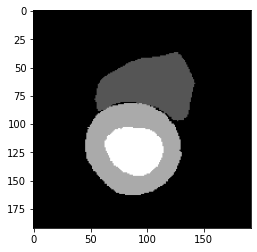

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt

#data = nib.load(r'results\2024-02-13_13H47\Lib\test\Raw\Registered\patient007\patient007_frame15.nii.gz')
#data = nib.load(r'results\2024-02-10_19H58\Lib\test\Raw\Registered\patient007\patient007_frame15.nii.gz')
#data = nib.load(r'results\2024-02-10_19H47\Lib\test\Raw\Registered\patient007\patient007_frame15.nii.gz')
data = nib.load(r"C:\Users\Portal\Documents\cardiac_tagging_motion_estimation\cardiac_tagging_motion_estimation\model\2024-02-13_15H04\Lib\test\Raw\Registered\patient007\patient007_frame15.nii.gz")
#data = nib.load(r"C:\Users\Portal\Documents\biomechanical_loss\models\2023-12-04_11H26\Lib\test\Raw\Registered\patient007\patient007_frame15.nii.gz")
#data = nib.load(r"C:\Users\Portal\Documents\biomechanical_loss\models\2023-12-04_11H26\Lib\test\Raw\Registered\patient007\patient007_frame15.nii.gz")
arr = data.get_fdata()
print(arr.shape)

fig, ax = plt.subplots(1, 1)
ax.imshow(arr[:, :, 0], cmap='gray')

In [1]:
%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt

#data = np.load(r'results\2024-02-13_13H47\Lib\test\Raw\Registered\patient007\patient007_frame15.nii.gz')
#data = np.load(r'results\2024-02-10_19H58\Lib\test\Raw\Registered\patient007\patient007_frame15.nii.gz')
#data = np.load(r"C:\Users\Portal\Documents\voxelmorph\results\2024-02-10_19H47\Lib\test\Raw\Flow\patient007\patient007_frame15.npz")
#data = np.load(r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-02-13_14H02\Lib\test\Raw\Flow\patient007\patient007_frame15.npz")
#data = np.load(r"C:\Users\Portal\Documents\cardiac_tagging_motion_estimation\cardiac_tagging_motion_estimation\model\2024-02-20_19H19\Lib\test\Raw\Flow\patient007\patient007_frame15.npz")
data = np.load(r"C:\Users\Portal\Documents\voxelmorph\raft\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow\patient007\patient007_frame11.npz")
#data = np.load(r"C:\Users\Portal\Documents\voxelmorph\new_models_256\2024-03-01_23H51_16s_864320\Task045_Lib\fold_0\Lib\val\Raw\Flow\patient011\patient011_frame11.npz")
#data = np.load(r'2024-02-08_00H01\Task045_Lib\fold_0\Lib\val\Raw\Flow\patient011\patient011_frame15.npz')
arr = data['flow']
print(arr.shape)
print(data['img'].shape)

fig, ax = plt.subplots(1, 1)

#arr = arr.transpose((1, 0, 2, 3))

depth=1
print(arr.shape)

step_quiver = 4
X, Y = np.meshgrid(np.arange(0, arr.shape[0], step=step_quiver), np.arange(arr.shape[1], step=step_quiver))
ax.imshow(data['img'][:, :, depth], cmap='gray')
ax.quiver(X, Y, arr[::step_quiver, ::step_quiver, depth, 1], arr[::step_quiver, ::step_quiver, depth, 0], color='r', angles='xy', scale_units='xy', scale=1)

(192, 192, 3, 2)
(192, 192, 3)
(192, 192, 3, 2)


In [2]:
%matplotlib qt

import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os

path_list = sorted(glob(os.path.join(r'2024-07-12_14H03\Task032_Lib\fold_0\Lib\test\Raw\Registered_backward\patient007', '*.npz')))
for path in path_list:
    data = np.load(path)
    arr = data['seg']

    fig, ax = plt.subplots(1, 1)
    ax.imshow(np.argmax(arr[:, :, :, 0], axis=0), cmap='gray')
    plt.waitforbuttonpress()
    plt.show()
    plt.close(fig)

In [6]:
%matplotlib qt

import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

#arr = np.load(r'iterative_warp\2024-07-02_11H29_59s_847044\Task032_Lib\fold_0\Lib\test\Raw\Registered_backward\patient007\patient007_frame05.npz')['seg']
arr = np.load(r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\debug\Lib\test\Raw\Registered_backward\patient007\patient007_frame05.npz")['seg']
print(arr.shape)

data = nib.load(r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered_backward\patient007\patient007_frame05.nii.gz")
arr2 = data.get_fdata()
print(arr2.shape)

#fig, ax = plt.subplots(1, 2)
#ax[0].imshow(arr[:, :, 0], cmap='gray')
#ax[1].imshow(arr2[:, :, 0], cmap='gray')

fig, ax = plt.subplots(1, 5)
for i in range(4):
    ax[i].imshow(arr[i, :, :, 0], cmap='gray')
ax[4].imshow(arr2[:, :, 0], cmap='gray')

(4, 192, 192, 3)
(512, 512, 3)


In [21]:
%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
import pickle
import nibabel as nib

data = np.load(r"C:\Users\Portal\Documents\voxelmorph\deformable\2024-06-21_20H02_56s_134828\Task045_Lib\fold_0\Lib\val\Postprocessed\Backward_flow\patient234\patient234_frame09.npz")
arr = data['flow']
print(arr.shape)
arr = arr.transpose(1, 0, 2, 3)
print(arr.shape)

path_list = glob(os.path.join(r'C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\out\nnUNet_raw_data_base\nnUNet_raw_data\Task045_Lib\imagesTr', 'patient234*.nii.gz'))

with open(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\custom_lib_t_4\patient234\info_01.pkl", 'rb') as f:
    data = pickle.load(f)
    ed_number = np.rint(data['ed_number']).astype(int)
    es_number = np.rint(data['es_number']).astype(int)

img_path = path_list[ed_number]
data = nib.load(img_path)
img = data.get_fdata()
print(img.shape)

fig, ax = plt.subplots(1, 1)

#arr = arr.transpose((1, 0, 2, 3))

depth=-1

step_quiver = 4
X, Y = np.meshgrid(np.arange(0, arr.shape[1], step=step_quiver), np.arange(arr.shape[0], step=step_quiver))
ax.imshow(img[:, :, depth], cmap='gray')
ax.quiver(X, Y, arr[::step_quiver, ::step_quiver, depth, 0], arr[::step_quiver, ::step_quiver, depth, 1], color='r', angles='xy', scale_units='xy', scale=1)

(216, 288, 3, 2)
(288, 216, 3, 2)
(288, 216, 3)


In [3]:
%matplotlib qt

import matplotlib.pyplot as plt
from glob import glob
import os
import nibabel as nib
import numpy as np

path_list = glob(os.path.join(r'C:\Users\Portal\Documents\voxelmorph\multi_task\2024-03-27_18H34_17s_684609\Task045_Lib\fold_0\Lib\val\Postprocessed\Registered_backward\patient017\temp_allClasses', '*.gz'))

arr_list = []
for path in path_list:
    data = nib.load(path)
    arr = data.get_fdata()
    arr_list.append(arr)
arr = np.stack(arr_list, axis=0)


path_list_best = glob(os.path.join(r'C:\Users\Portal\Documents\voxelmorph\new_models_256\2024-03-01_23H51_16s_864320\Task045_Lib\fold_0\Lib\val\Postprocessed\Registered\patient017\temp_allClasses', '*.gz'))
print(path_list_best)
arr_best_list = []
for path in path_list_best:
    data = nib.load(path)
    arr_best = data.get_fdata()
    arr_best_list.append(arr_best)
arr_best = np.stack(arr_best_list, axis=0)

path_list_gt = glob(os.path.join(r'C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Lib_training_2\patient017', '*gt.nii.gz'))
print(path_list_gt)
arr_gt_list = []
for path in path_list_gt:
    data = nib.load(path)
    arr_gt = data.get_fdata()
    arr_gt_list.append(arr_gt)
arr_gt = np.stack(arr_gt_list, axis=0)

fig, ax = plt.subplots(1, 1)
ax.imshow(arr_gt[0, :, :, 1], cmap='gray')
ax.axis('off')
plt.show()

#for i in range(len(arr)):
#    fig, ax = plt.subplots(1, 3)
#    ax[0].imshow(arr[i, :, :, 1], cmap='gray')
#    ax[1].imshow(arr_best[i, :, :, 1], cmap='gray')
#    ax[2].imshow(arr_gt[i, :, :, 1], cmap='gray')
#    while not plt.waitforbuttonpress(): pass
#    plt.show()
#    plt.close(fig)

['C:\\Users\\Portal\\Documents\\voxelmorph\\new_models_256\\2024-03-01_23H51_16s_864320\\Task045_Lib\\fold_0\\Lib\\val\\Postprocessed\\Registered\\patient017\\temp_allClasses\\patient017_frame01.nii.gz', 'C:\\Users\\Portal\\Documents\\voxelmorph\\new_models_256\\2024-03-01_23H51_16s_864320\\Task045_Lib\\fold_0\\Lib\\val\\Postprocessed\\Registered\\patient017\\temp_allClasses\\patient017_frame02.nii.gz', 'C:\\Users\\Portal\\Documents\\voxelmorph\\new_models_256\\2024-03-01_23H51_16s_864320\\Task045_Lib\\fold_0\\Lib\\val\\Postprocessed\\Registered\\patient017\\temp_allClasses\\patient017_frame03.nii.gz', 'C:\\Users\\Portal\\Documents\\voxelmorph\\new_models_256\\2024-03-01_23H51_16s_864320\\Task045_Lib\\fold_0\\Lib\\val\\Postprocessed\\Registered\\patient017\\temp_allClasses\\patient017_frame04.nii.gz', 'C:\\Users\\Portal\\Documents\\voxelmorph\\new_models_256\\2024-03-01_23H51_16s_864320\\Task045_Lib\\fold_0\\Lib\\val\\Postprocessed\\Registered\\patient017\\temp_allClasses\\patient017_f

In [4]:
%matplotlib qt

import matplotlib.pyplot as plt
from glob import glob
import os
import nibabel as nib
import numpy as np



for i in range(len(arr)):
    fig, ax = plt.subplots(1, 1)
    ax.imshow(arr[i, :, :, 1], cmap='gray')
    plt.waitforbuttonpress()
    plt.show()
    plt.close(fig)

In [1]:
%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

data = np.load(r"C:\Users\Portal\Documents\voxelmorph\2023-12-15_19H01\cumulative_sum\Lib\test\Postprocessed\Flow\patient270\patient270_frame15.npz")
data_img = nib.load(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Lib_testing_2\patient270\patient270_frame26.nii.gz")
img = data_img.get_fdata()
print(img.shape)
arr = data['flow']
print(arr.shape)

fig, ax = plt.subplots(1, 1)

arr = arr.transpose((1, 0, 2, 3))

step_quiver = 4
X, Y = np.meshgrid(np.arange(0, arr.shape[0], step=step_quiver), np.arange(arr.shape[1], step=step_quiver))
ax.imshow(img[:, :, 0], cmap='gray')
ax.quiver(X, Y, arr[::step_quiver, ::step_quiver, 0, 1], arr[::step_quiver, ::step_quiver, 0, 0], color='r', angles='xy', scale_units='xy', scale=1)

(288, 288, 3)
(288, 288, 3, 2)


In [2]:
%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

data = np.load(r"C:\Users\Portal\Documents\voxelmorph\exposant\exposant_1\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\patient270\patient270_frame15.npz")
data_img = nib.load(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Lib_testing_2\patient270\patient270_frame26.nii.gz")
img = data_img.get_fdata()
print(img.shape)
arr = data['flow']
print(arr.shape)

fig, ax = plt.subplots(1, 1)

arr = arr.transpose((1, 0, 2, 3))

step_quiver = 4
X, Y = np.meshgrid(np.arange(0, arr.shape[0], step=step_quiver), np.arange(arr.shape[1], step=step_quiver))
ax.imshow(img[:, :, 0], cmap='gray')
ax.quiver(X, Y, arr[::step_quiver, ::step_quiver, 0, 0], arr[::step_quiver, ::step_quiver, 0, 1], color='r', angles='xy', scale_units='xy', scale=1)

(288, 288, 3)
(288, 288, 3, 2)


In [1]:
from glob import glob
import os
import numpy as np
import shutil
from pathlib import Path
from tqdm import tqdm
import pickle

def delete_if_exist(folder_name):
    dirpath = Path(folder_name)
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)

dst_folder_name = r'ED_ES_data'
ed_dst_path = os.path.join(dst_folder_name, 'ED')
es_dst_path = os.path.join(dst_folder_name, 'ES')

delete_if_exist(dst_folder_name)
os.makedirs(ed_dst_path)
os.makedirs(es_dst_path)

path_list = glob(os.path.join(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Lib_resampling_training_mask", '*'))
path_list_npy = [x for x in path_list if '.npy' in x]
path_list_pkl = [x for x in path_list if '.pkl' in x]
assert len(path_list_npy) == len(path_list_pkl)

patient_list = np.unique([os.path.basename(x).split('_')[0] for x in path_list_npy])

all_patient_paths = []
all_patient_paths_pkl = []
for patient in patient_list:
    patient_files = []
    patient_files_pkl = []
    for (npy_path, pkl_path) in zip(path_list_npy, path_list_pkl):
        if patient in npy_path:
            patient_files.append(npy_path)
        if patient in pkl_path:
            patient_files_pkl.append(pkl_path)
    all_patient_paths.append(sorted(patient_files))
    all_patient_paths_pkl.append(sorted(patient_files_pkl))

for (path_list_npy, path_list_pkl) in tqdm(zip(all_patient_paths, all_patient_paths_pkl), total=len(all_patient_paths)):

    with open(path_list_pkl[0], 'rb') as f:
        data = pickle.load(f)
        ed_number = np.rint(data['ed_number']).astype(int)
        es_number = np.rint(data['es_number']).astype(int)

    shutil.copy(path_list_npy[ed_number], ed_dst_path)
    shutil.copy(path_list_npy[es_number], es_dst_path)

    shutil.copy(path_list_pkl[ed_number], ed_dst_path)
    shutil.copy(path_list_pkl[es_number], es_dst_path)

100%|██████████| 220/220 [00:03<00:00, 55.47it/s]
